# **Data Preparing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [50]:
pd.set_option('display.max_rows', None)

In [8]:
laptop_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Dataset/data2.csv', sep=',')

In [9]:
laptop_df.head()

,brand,name,processor,Ram,Ram_type,Storage,Storage_type,GPU,display_size,resolution_width,resolution_height,OS,Price
0,HP,Victus 15-fb0157AX Gaming Laptop,AMD Ryzen 5 5600H,8,DDR4,512,SSD,AMD Radeon RX 6500M,15.6,1920,1080,Windows 11 OS,9381200
1,HP,15s-fq5007TU Laptop,Intel Core i3 1215U,8,DDR4,512,SSD,Integrated Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,7501200
2,Acer,One 14 Z8-415 Laptop,Intel Core i3 1115G4,8,DDR4,512,SSD,Integrated Intel Iris Xe Graphics,14.0,1920,1080,Windows 11 OS,5074120
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,Intel Core i5 1240P,16,LPDDR5,512,SSD,Integrated Intel Iris Xe Graphics,14.0,2240,1400,Windows 11 OS,11229052
4,Apple,MacBook Air 2020 MGND3HN Laptop,Apple M1,8,DDR4,256,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,Mac OS,13158120


In [10]:
print(f'laptop_df shape: {laptop_df.shape}')

laptop_df shape: (890, 13)


In [11]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              890 non-null    object 
 1   name               890 non-null    object 
 2   processor          890 non-null    object 
 3   Ram                890 non-null    int64  
 4   Ram_type           890 non-null    object 
 5   Storage            890 non-null    int64  
 6   Storage_type       890 non-null    object 
 7   GPU                890 non-null    object 
 8   display_size       890 non-null    float64
 9   resolution_width   890 non-null    int64  
 10  resolution_height  890 non-null    int64  
 11  OS                 890 non-null    object 
 12  Price              890 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 90.5+ KB


In [ ]:
laptop_df.describe()

,Ram,Storage,display_size,resolution_width,resolution_height,Price
count,890.000000,890.000000,890.000000,890.000000,890.000000,8.900000e+02
mean,13.233708,614.831461,15.174449,2034.847191,1216.184270,1.497262e+07
std,6.454251,274.716143,0.938058,425.107227,323.304162,1.141388e+07
min,2.000000,32.000000,11.600000,1080.000000,768.000000,1.879812e+06
25%,8.000000,512.000000,14.000000,1920.000000,1080.000000,8.322290e+06
50%,16.000000,512.000000,15.600000,1920.000000,1080.000000,1.165412e+07
75%,16.000000,512.000000,15.600000,1920.000000,1200.000000,1.701090e+07
max,64.000000,2048.000000,18.000000,3840.000000,3456.000000,8.460733e+07


# **Distribusi Tiap Fitur**

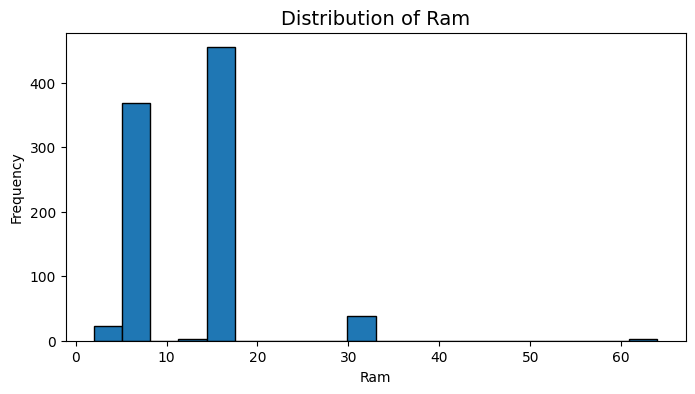

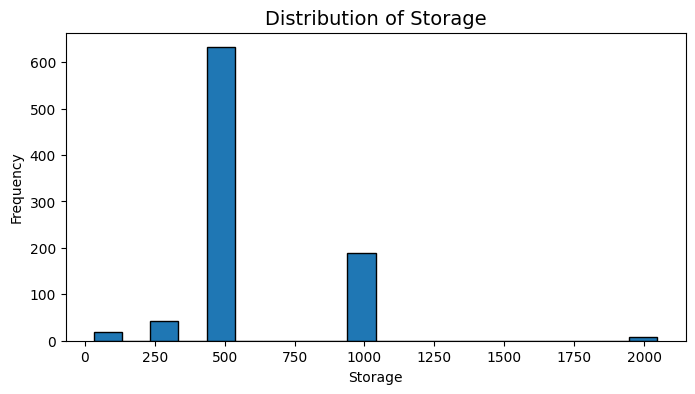

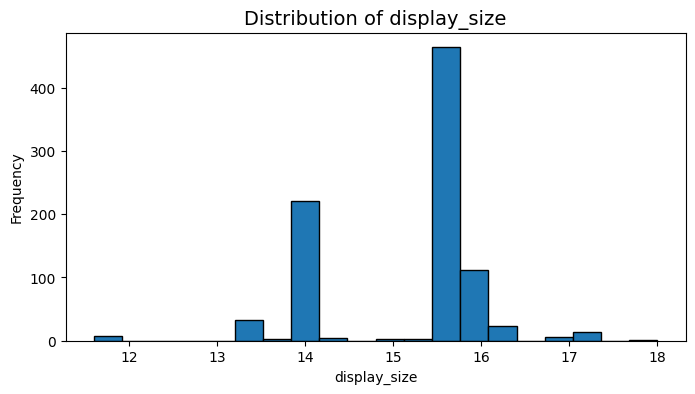

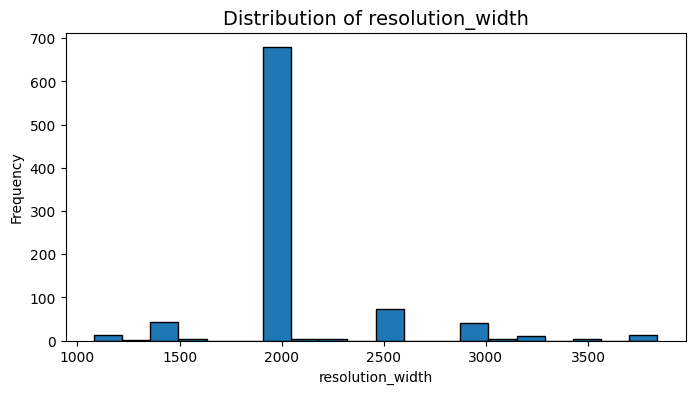

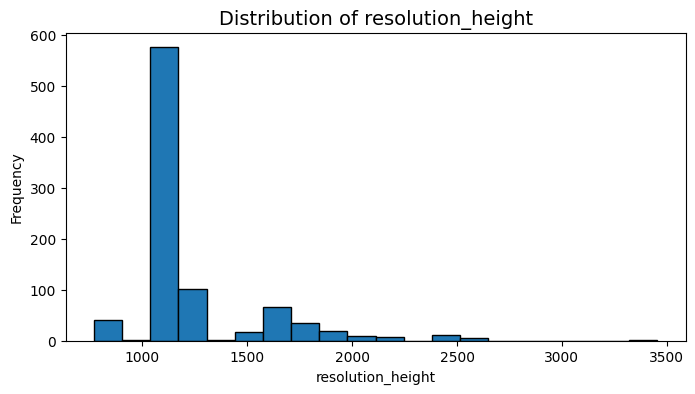

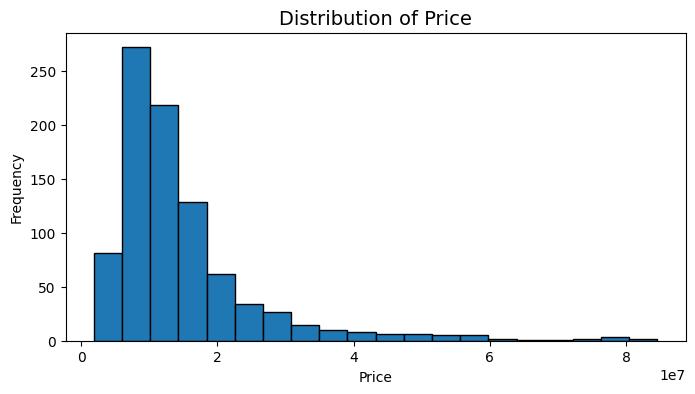

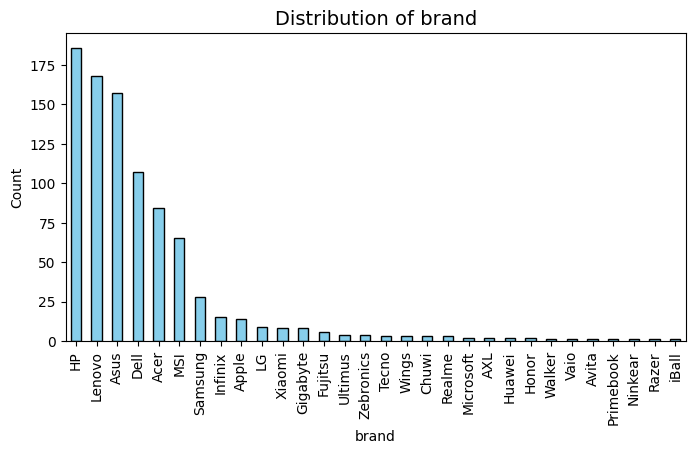

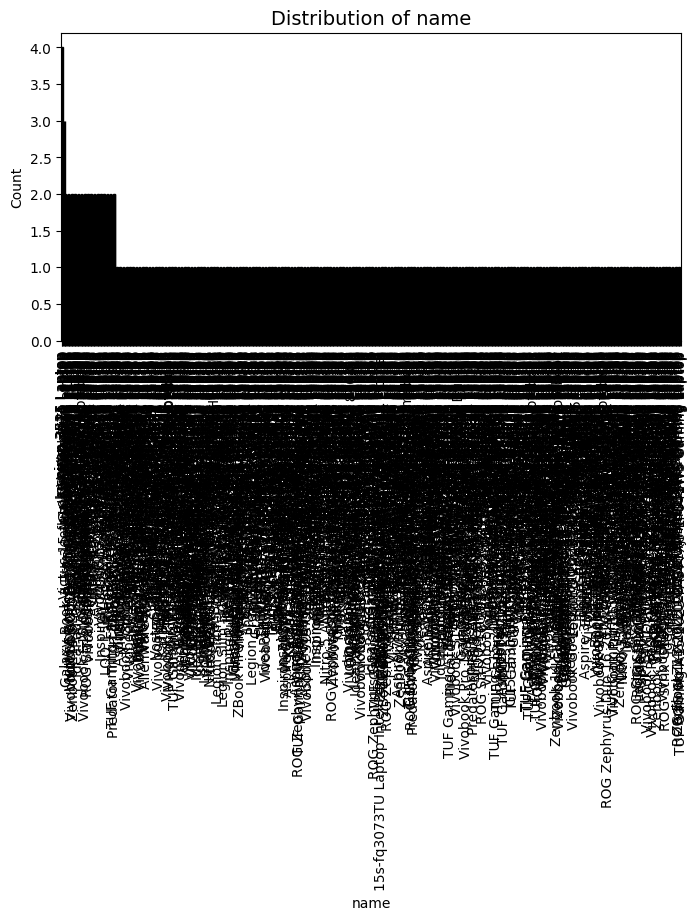

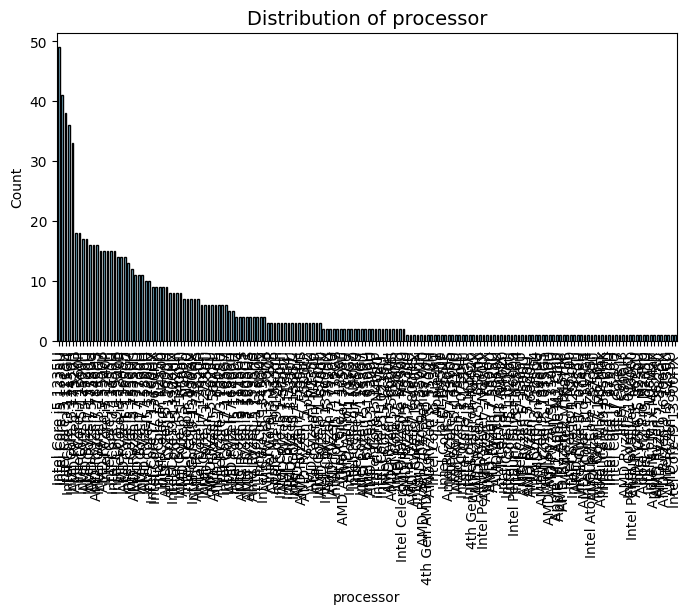

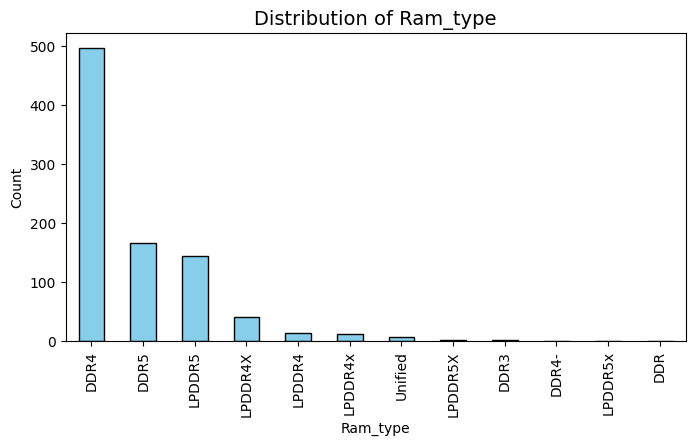

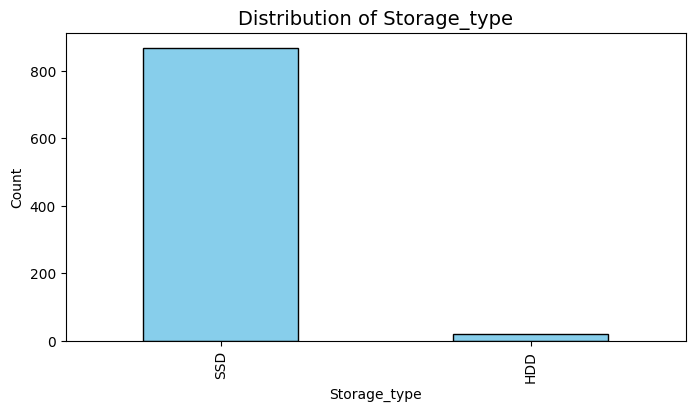

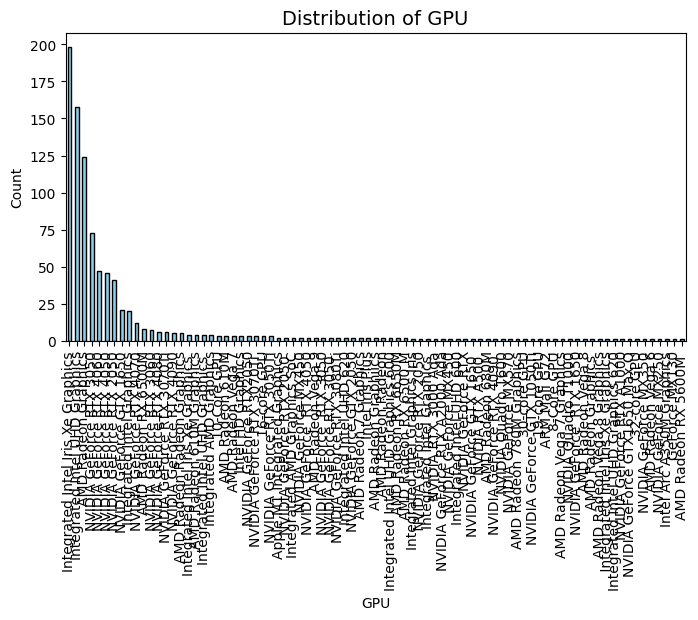

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


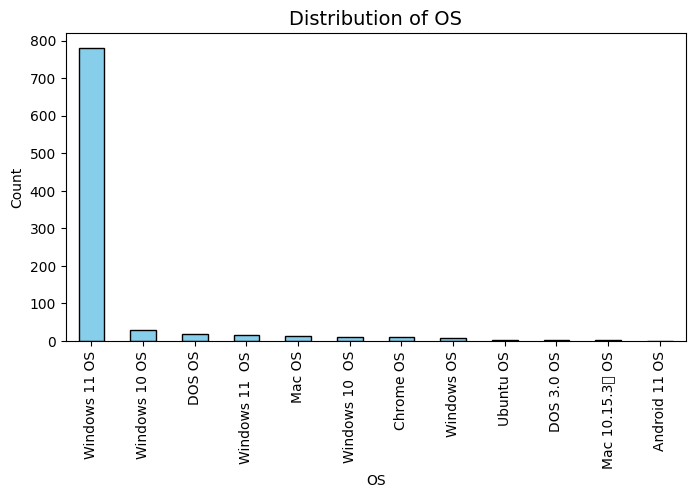

In [12]:
numeric_columns = laptop_df.select_dtypes(include=['number']).columns
categorical_columns = laptop_df.select_dtypes(exclude=['number']).columns

# Plot numeric columns with histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    laptop_df[col].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

# Plot categorical columns with bar plots
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    laptop_df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(False)
    plt.show()

In [14]:
X = laptop_df.drop(['Price'], axis=1)
y = laptop_df['Price']
y

,Price
0,9381200
1,7501200
2,5074120
3,11229052
4,13158120
...,...
885,8458120
886,20680000
887,35718120
888,24438120


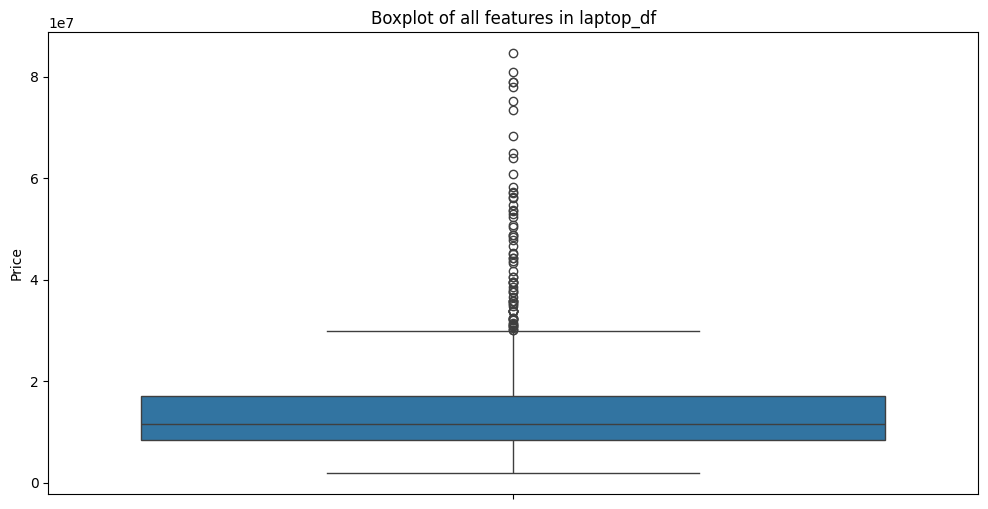

In [42]:
# prompt: plot the boxplot of all features on combined_df

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined_df' is your DataFrame and it's already loaded

plt.figure(figsize=(12, 6))
sns.boxplot(data=laptop_df['Price'])
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of all features in laptop_df')
plt.show()

Terdapat harga laptop yang terbilang sangat tinggi. Dengan asumsi bahwa orang yang sanggup membeli laptop dengan harga sangat tinggi tersebut tidak perlu melakukan pengecekan harga. Oleh karena itu, untuk mengurangi skewness data maka removing outlier akan menyederhanakan dataset.

# **Korelasi Terhadap Target**

In [ ]:
col_numeric = laptop_df.dtypes(include=['number']).columns
col_categoric = laptop_df.dtypes(exclude=['number']).columns

In [16]:
X[col_numeric]=X[col_numeric].fillna(0)
X[col_categoric]=X[col_categoric].fillna('Unknown')

               Fitur  Mutual Information
0                Ram            0.435966
4  resolution_height            0.310343
1            Storage            0.285746
2       display_size            0.238800
3   resolution_width            0.238488


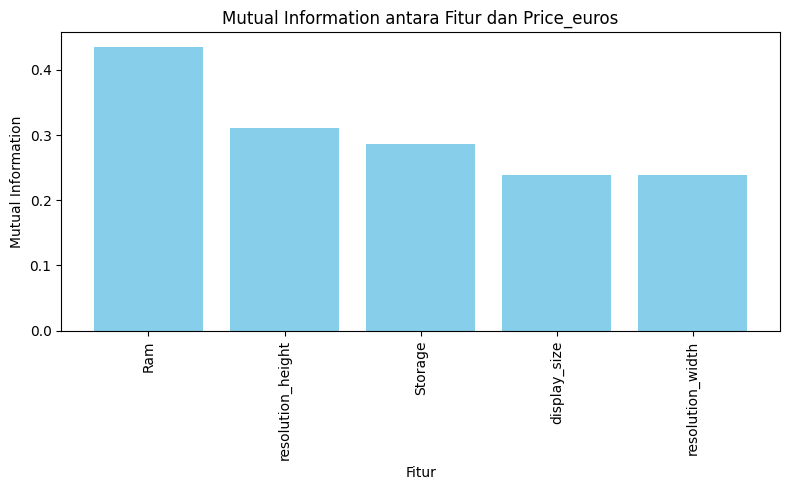

In [17]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Assuming 'mbahlaptop_df' is your DataFrame

# Select only numeric features for mutual information calculation
X_numeric = X.select_dtypes(include=['number'])

# Calculate mutual information
mi = mutual_info_regression(X_numeric, y, discrete_features='auto')  # Use 'auto' for automatic detection

# Create DataFrame for results
mi_df = pd.DataFrame({'Fitur': X_numeric.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Display results
print(mi_df)

# Visualize results
plt.figure(figsize=(8, 5))
plt.bar(mi_df['Fitur'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Fitur')
plt.ylabel('Mutual Information')
plt.title('Mutual Information antara Fitur dan Price_euros')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


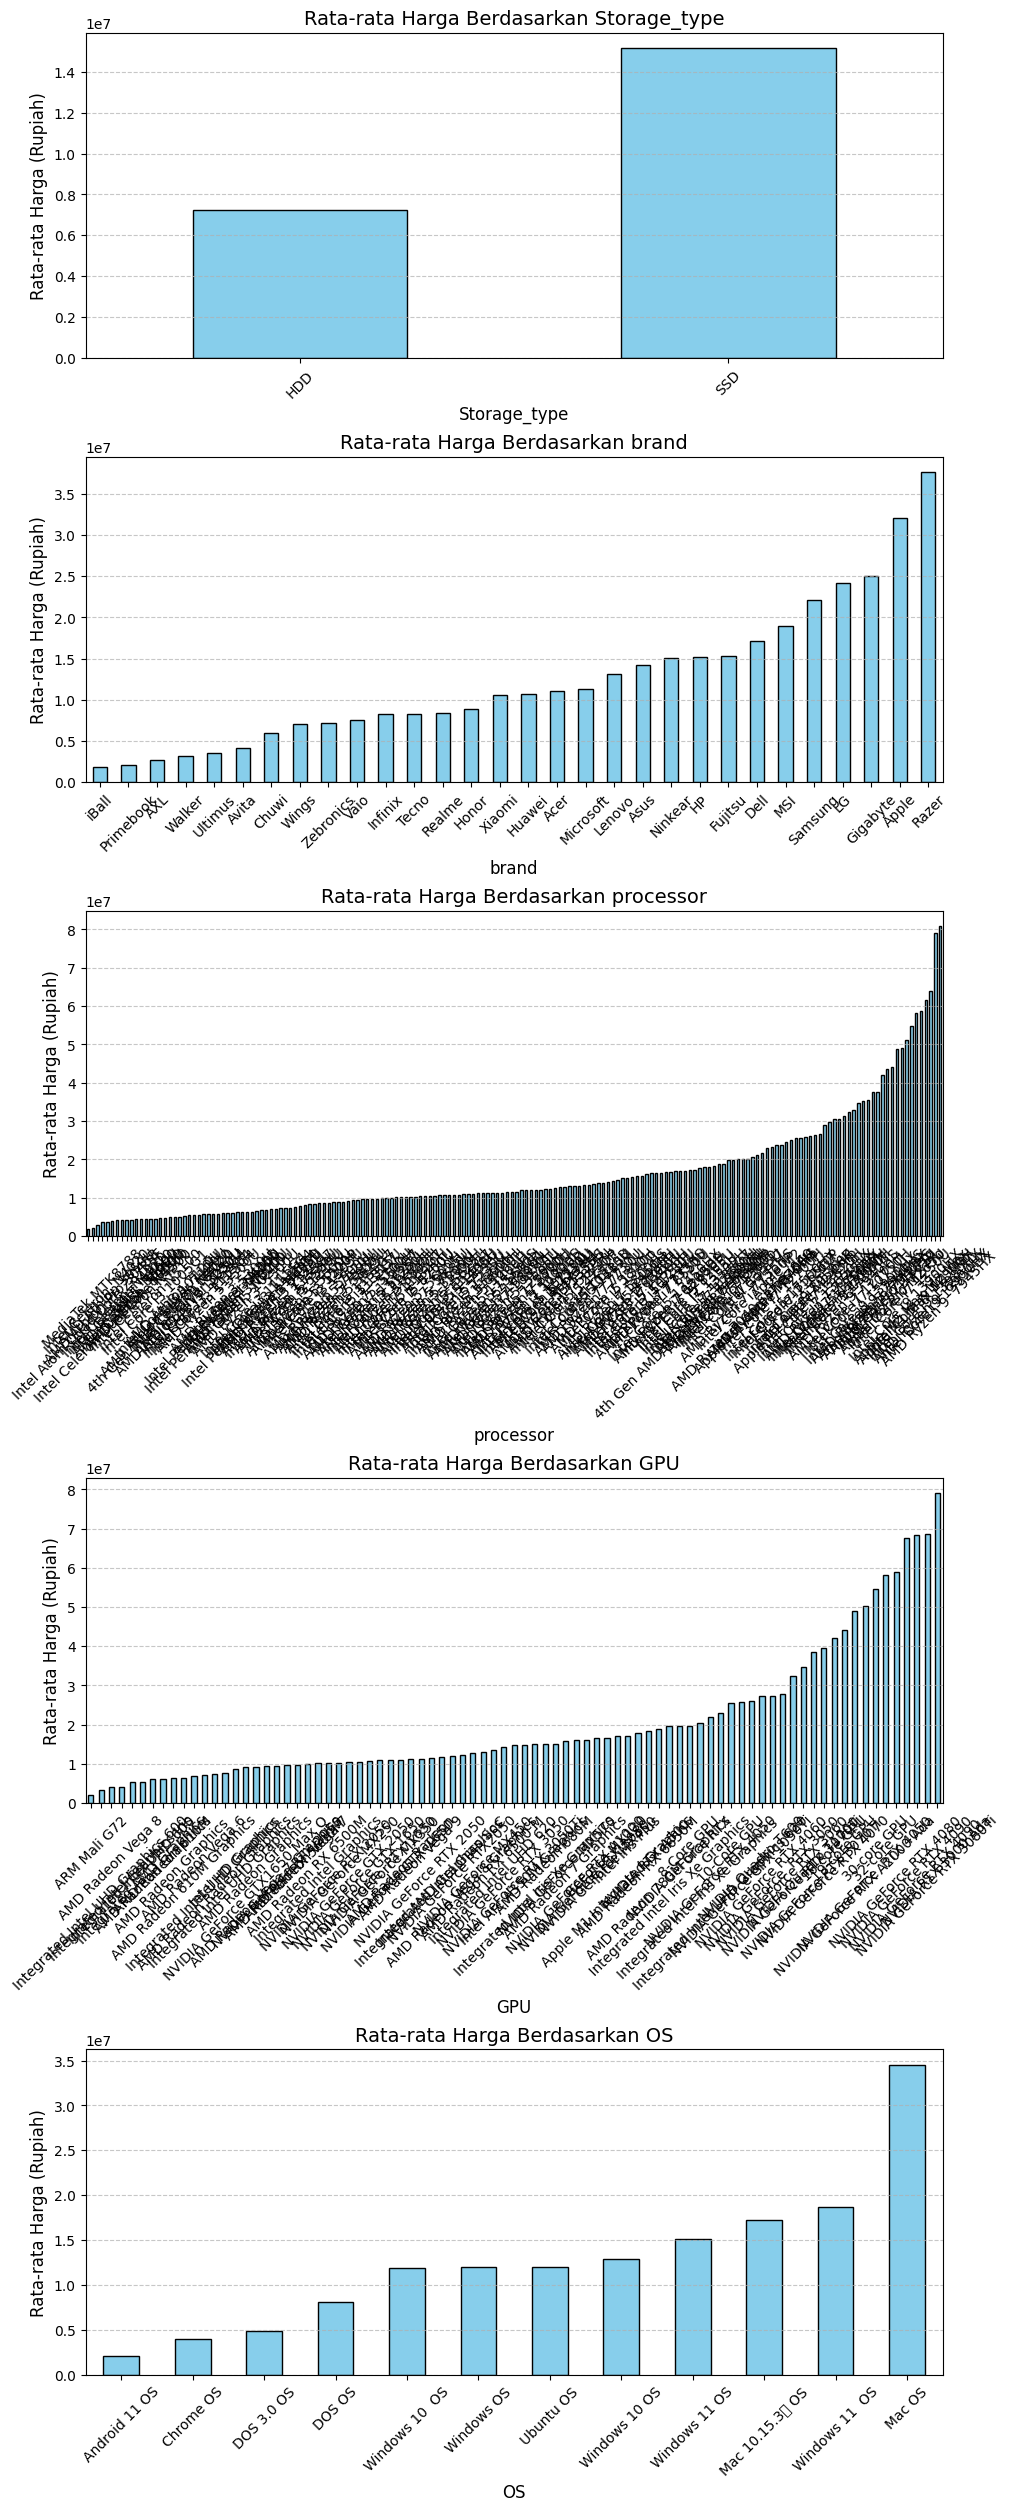

In [39]:
import matplotlib.pyplot as plt

# # Daftar fitur kategori
col_categoric = ['Storage_type', 'brand', 'processor', 'GPU', 'OS']

# Atur ukuran figure dan jumlah subplot
n_features = len(col_categoric)
fig, axes = plt.subplots(n_features, 1, figsize=(10, 5 * n_features), constrained_layout=True)

# Visualisasi setiap fitur
for i, feature in enumerate(col_categoric):
    # Hitung rata-rata harga berdasarkan kategori
    category_price_comparison = laptop_df.groupby(feature)['Price'].mean().sort_values()

    # Plotkan
    ax = axes[i]
    category_price_comparison.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Rata-rata Harga Berdasarkan {feature}', fontsize=14)
    ax.set_ylabel('Rata-rata Harga (Rupiah)', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

# Tampilkan plot
plt.show()

In [52]:
laptop_df.groupby(['processor'])['Price'].mean().sort_values(ascending=False)

,Price
processor,
AMD Ryzen 9 7945HX,8.083812e+07
Intel Core i9 13950HX,7.895812e+07
AMD Ryzen 9 6900HX,6.391812e+07
Intel Core i9 13980HX,6.150280e+07
Intel Core i9 12900H,5.869429e+07
Apple M1 Max M1 Max,5.818412e+07
Apple M2 Max M2 Max,5.470612e+07
Intel Core i9 13900HX,5.121771e+07
Intel Core i7 1250U,4.908586e+07




1.   Ukuran RAM sangat memengaruhi harga laptop.
2.   Semakin tinggi atau baru CPU dan GPUnya semakin tinggi pula harga laptopnya



# **Perbandingan antar Fitur**

In [53]:
laptop_df.groupby(['brand','name', 'Ram'])['Price'].mean()

brand      name                                                                      Ram
AXL        Vayu Book LAP01 Laptop                                                    4      2.442120e+06
           Vayu Book LAP02 Laptop                                                    4      3.006120e+06
Acer       Aspire 3 A315-24P NX.KDESI.003 Laptop                                     8      5.262120e+06
           Aspire 3 A315-24P NX.KDESI.004 Laptop                                     8      7.142120e+06
           Aspire 3 A315-24P NX.KDESI.00B Laptop                                     8      6.390120e+06
           Aspire 3 A315-510P Laptop                                                 8      5.636240e+06
           Aspire 3 A315-58 Laptop UN.ADDSI.036 Laptop                               8      5.922000e+06
           Aspire 3 A315-59 Laptop                                                   8      6.880518e+06
           Aspire 3 A315-59 NX.K6TSI.00C Laptop                                      8      6.578120e+06
           Aspire 3 NX.KDESI.008 Laptop                                              8      5.826120e+06
           Aspire 3 Spin 14 NX.KENSI.002 Laptop                                      8      7.501200e+06
           Aspire 5 14 A514-56GM 2023 Gaming Laptop                                  16     1.033812e+07
           Aspire 5 15 A515-58M Gaming Laptop                                        16     1.052612e+07
           Aspire 5 2023 A515-58M Gaming Laptop                                      8      1.504000e+07
           Aspire 5 A514-56M 2023 Gaming Laptop                                      8      9.774120e+06
           Aspire 5 A515-56G NX.AT2SI.001 Laptop                                     8      8.458120e+06
           Aspire 5 A515-57 2022 Laptop                                              16     9.210120e+06
           Aspire 5 A515-57 NX.K2VSI.002 Laptop                                      8      6.954120e+06
           Aspire 5 A515-57G Gaming Laptop                                           8      9.800064e+06
           Aspire 5 A515-57G UN.K9TSI.002 Gaming Laptop                              16     1.033981e+07
           Aspire 5 A515-57G-58R7 Gaming Laptop                                      8      1.090381e+07
           Aspire 5 A515-58GM 15 2023 Gaming Laptop                                  16     1.221812e+07
           Aspire 5 A515-58M NX.KHFSI.003 Gaming Laptop                              8      7.894120e+06
           Aspire 5 A515-58M NX.KHGSI.002 Gaming Laptop                              16     1.071412e+07
           Aspire 5 A515-58P NX.KHJSI.001 Gaming Laptop                              8      7.513420e+06
           Aspire 5 UN.K3JSI.004 Laptop                                              12     9.022120e+06
           Aspire 7 A715-76G NH.QMESI.003 Gaming Laptop                              8      9.586120e+06
           Aspire 7 A715-76G NH.QMFSI.004 Gaming Laptop                              16     1.146612e+07
           Aspire 7 A715-76G UN.QMESI.003 Gaming Laptop                              16     1.033812e+07
           Aspire 7 A715-76G UN.QMESI.004 Gaming Laptop                              16     1.015012e+07
           Aspire 7 A715-76G UN.QMYSI.002 Gaming Laptop                              16     1.033812e+07
           Aspire Lite 15 AL15-51 2023  Laptop                                       16     8.647812e+06
           Aspire Lite 2023 AL15-51 Laptop                                           8      7.518120e+06
           Aspire Lite AL15 Laptop                                                   16     7.142120e+06
           Aspire Lite AL15-51 2023 Laptop                                           8      6.766120e+06
           Aspire Lite AL15-51 UN.431SI.288 Laptop                                   8      7.330120e+06
           Aspire Vero AV14-52P NX.KJTSI.002 Laptop                                  16     9.398120e+06
           C734 NX.H8VSI.0

<ipython-input-25-b453b8d0e21f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(
<ipython-input-25-b453b8d0e21f>:14: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
<ipython-input-25-b453b8d0e21f>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


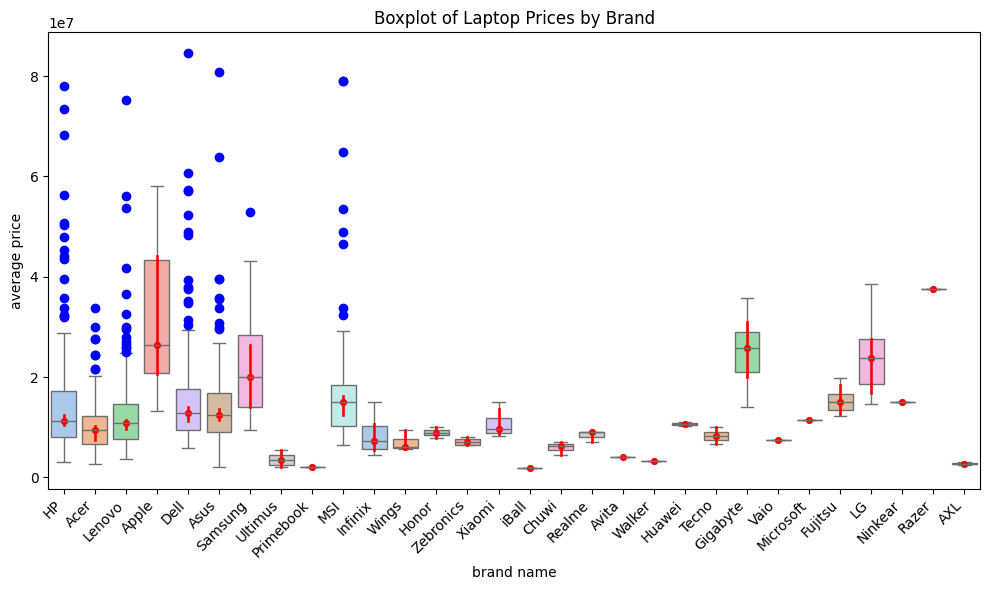

In [25]:
# Membuat plot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(
    x='brand',
    y='Price',
    data=laptop_df,
    palette='pastel',
    showmeans=False,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"},
    flierprops={"marker": "o", "markerfacecolor": "blue", "markeredgecolor": "blue"}
)

# Menambahkan median sebagai titik merah
sns.pointplot(
    x='brand',
    y='Price',
    data=laptop_df,
    join=False,
    estimator='median',
    color='red',
    scale=0.7
)

# Menyesuaikan tema
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("average price")
plt.xlabel("brand name")
plt.title("Boxplot of Laptop Prices by Brand")
plt.tight_layout()

<ipython-input-26-9f3084c514c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(
<ipython-input-26-9f3084c514c4>:14: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
<ipython-input-26-9f3084c514c4>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


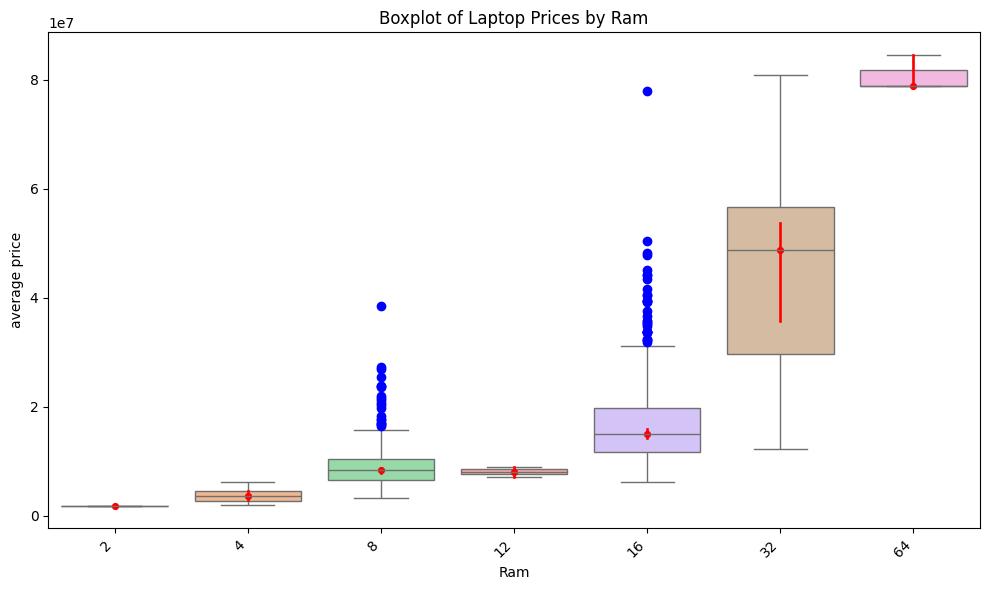

In [26]:
# Membuat plot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(
    x='Ram',
    y='Price',
    data=laptop_df,
    palette='pastel',
    showmeans=False,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"},
    flierprops={"marker": "o", "markerfacecolor": "blue", "markeredgecolor": "blue"}
)

# Menambahkan median sebagai titik merah
sns.pointplot(
    x='Ram',
    y='Price',
    data=laptop_df,
    join=False,
    estimator='median',
    color='red',
    scale=0.7
)

# Menyesuaikan tema
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("average price")
plt.xlabel("Ram")
plt.title("Boxplot of Laptop Prices by Ram")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


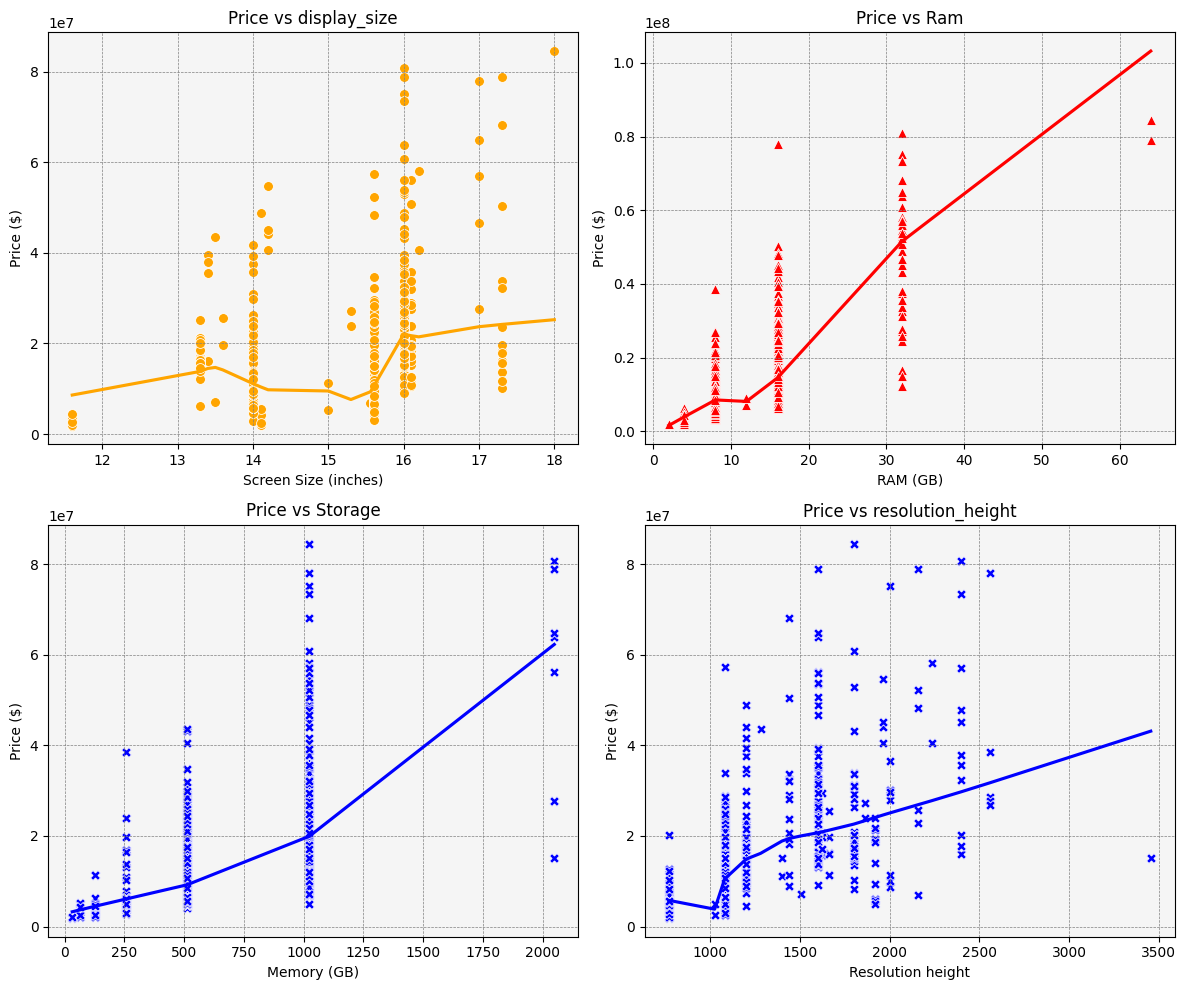

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Fungsi untuk membuat scatter plot dengan smoothed line
def plot_scatter(ax, x, y, data, point_color, line_color, marker_shape, x_label, y_label):
    sns.scatterplot(
        x=x, y=y, data=data, ax=ax, color=point_color, marker=marker_shape, s=50
    )
    sns.regplot(
        x=x, y=y, data=data, ax=ax, scatter=False, lowess=True, line_kws={'color': line_color}
    )
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f"{y} vs {x}")

# Membuat layout grid untuk 4 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot 1: inches vs price
plot_scatter(
    axs[0, 0], 'display_size', 'Price', laptop_df, point_color="orange",
    line_color="orange", marker_shape="o", x_label="Screen Size (inches)", y_label="Price ($)"
)

# Plot 2: ram vs Price
plot_scatter(
    axs[0, 1], 'Ram', 'Price', laptop_df, point_color="red",
    line_color="red", marker_shape="^", x_label="RAM (GB)", y_label="Price ($)"
)

# Plot 3: memory vs Price
plot_scatter(
    axs[1, 0], 'Storage', 'Price', laptop_df, point_color="blue",
    line_color="blue", marker_shape="X", x_label="Memory (GB)", y_label="Price ($)"
)

# Plot 4: resolution height vs Price
plot_scatter(
    axs[1, 1], 'resolution_height', 'Price', laptop_df, point_color="blue",
    line_color="blue", marker_shape="X", x_label="Resolution height", y_label="Price ($)"
)

# Menambahkan tema mirip theme_linedraw
for ax in axs.flat:
    ax.set_facecolor('whitesmoke')
    ax.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()

Dapat terlihat bahwa antar fitur masih sesuai, semakin tinggi atau besar fiturnya harganya juga akan semakin mahal